In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None, 'max_colwidth', 250)

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
reddit = pd.read_csv('reddit_final.csv', index_col=[0])

In [3]:
reddit.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams more than east teams right?
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1"
3,0,"This meme isn't funny none of the ""new york nigga"" ones are."
4,0,I could use one of those tools.


In [4]:
reddit.sample(25, random_state=42)

,label,comment
139485,0,Trufant
276174,0,Too soon
590507,0,"Also, phone lights have no throw."
652534,1,"The Pirate Bay, of course!"
333855,0,Doesn't Sop have a Mac version though?
658094,1,"You're a white chick, it will become natural."
47928,1,Forgot the
355899,0,Who said i wouldn't?
233958,1,3756D QUANTUM GALACTIC SPACE CHESS GUYS
194496,1,Of course they're all white lol


In [5]:
X = reddit['comment']
y = reddit['label']

In [6]:
# first split into test and remainder
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [7]:
# second split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size = 0.25, random_state=42)

In [8]:
stemmer = nltk.stem.PorterStemmer()
stop_words = stopwords.words('english')

def tokenizer(sentence):
    
    num_range = range(0,31)
    
    for num in num_range:
        sentence = sentence.replace(str(num), '')
    
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()
        
    
    # split sentence into words
    words_list = sentence.split(' ')
    tokens = []
    
    
    # remove stopwords and any tokens that are just empty strings
    for word in words_list:
        if (not word in stop_words) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            tokens.append(stemmed_word)

    return tokens

In [9]:
count_vector = CountVectorizer(min_df=25, tokenizer=tokenizer, max_features=1500, dtype=np.int8)

count_vector.fit(X_train)
train_vectors = count_vector.transform(X_train)

val_vectors = count_vector.transform(X_val)
test_vectors = count_vector.transform(X_test)

C:\Users\gravi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
train_vector_df = pd.DataFrame(columns= count_vector.get_feature_names_out(), data=train_vectors.toarray())

train_vector_df.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decad,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,i

In [ ]:
train_vector_df.info()

In [11]:
val_vector_df = pd.DataFrame(columns= count_vector.get_feature_names_out(), data=val_vectors.toarray())

val_vector_df.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decad,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,i

In [12]:
test_vector_df = pd.DataFrame(columns= count_vector.get_feature_names_out(), data=test_vectors.toarray())

test_vector_df.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decad,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,i

In [13]:
X_train.head()

184196                                                                                                                                                                                                   No, it's *Wales*
343347    The most rare (unfortunately) and best games are when you have a competent squad leader, who issues orders and even though no one says a word, you all move as one and choose classes to compliment each other.
463357                                                                                                Ugh it looks like such a bad game, sony should just put it on igc right away so maybe people will actually play it.
717939                                                                                                                                                                  I don't know if you saw my edit but I removed it.
473430                                                                                                                          

In [14]:
logreg = LogisticRegression()

logreg.fit(train_vector_df, y_train)

print(f'Train score: {logreg.score(train_vector_df, y_train)}')
print(f'Val score: {logreg.score(val_vector_df, y_val)}')

Train score: 0.6608879804969342
Val score: 0.6569344991530746


In [15]:
train_acc = []
val_acc = []

c_range = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])

for c in c_range:
    logreg = LogisticRegression(C=c)
    
    logreg.fit(train_vector_df, y_train)
    
    train_acc.append(logreg.score(train_vector_df, y_train))
    val_acc.append(logreg.score(val_vector_df, y_val))

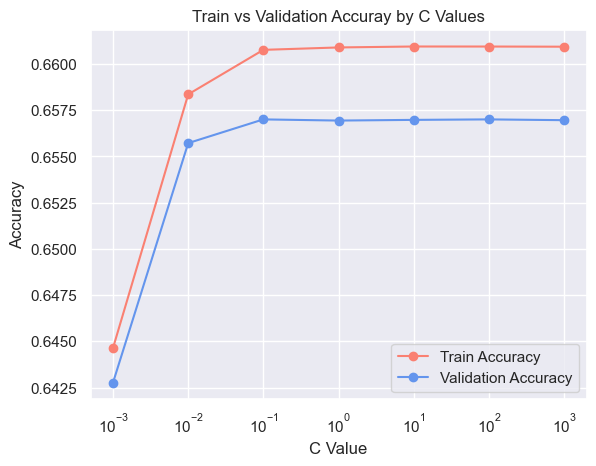

In [16]:
plt.figure()
plt.plot(c_range, train_acc, color='salmon', marker='o', label='Train Accuracy')
plt.plot(c_range, val_acc, color='cornflowerblue', marker='o', label='Validation Accuracy')
plt.title('Train vs Validation Accuray by C Values')
plt.ylabel('Accuracy')
plt.xlabel('C Value')
plt.xscale('log')
plt.legend()
plt.show()

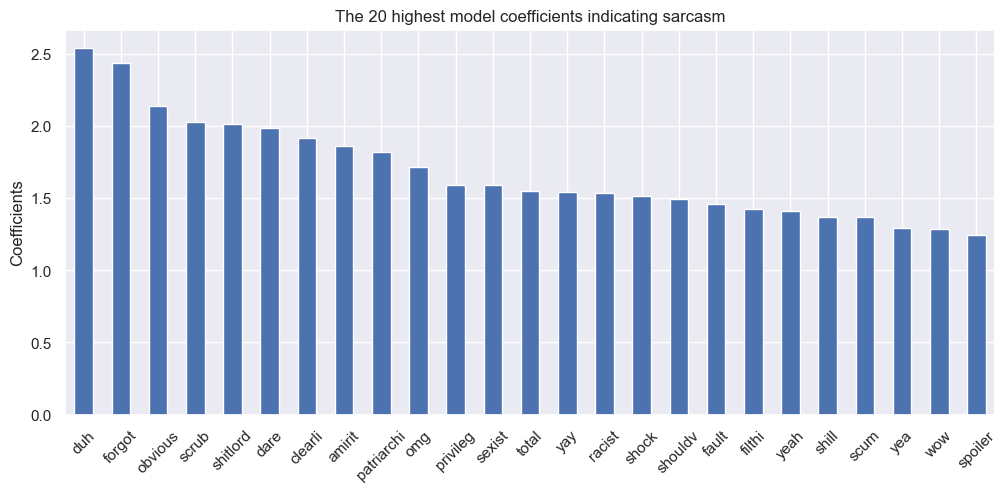

In [17]:
# plotting top positive predictor words
sarcastic_predictors = pd.DataFrame({"coef": logreg.coef_[0,0:]},
    index=logreg.feature_names_in_[0:]).sort_values("coef", ascending=False).head(25)

sarcastic_predictors.plot(kind="bar", figsize=(12, 5), legend=False)
plt.title("The 20 highest model coefficients indicating sarcasm")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

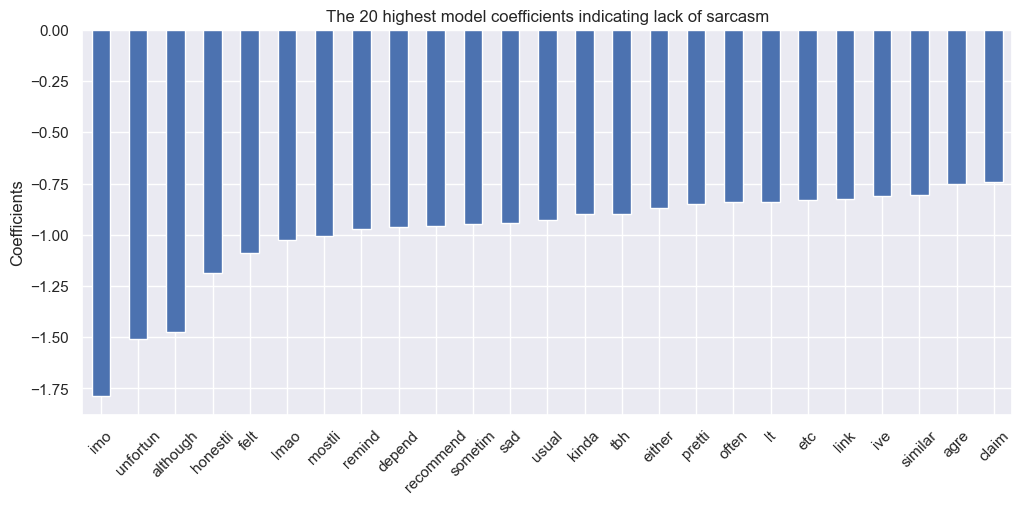

In [18]:
# plotting top positive predictor words
non_sarcastic_predictors = pd.DataFrame({"coef": logreg.coef_[0,0:]},
    index=logreg.feature_names_in_[0:]).sort_values("coef", ascending=True).head(25)

non_sarcastic_predictors.plot(kind="bar", figsize=(12, 5), legend=False)
plt.title("The 20 highest model coefficients indicating lack of sarcasm")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [19]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=25,
                        tokenizer=tokenizer, max_features=1500, dtype=np.float32)
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

C:\Users\gravi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
train_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_train_tfidf.toarray())

train_tfidf.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,increas

In [21]:
val_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_val_tfidf.toarray())

val_tfidf.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,increas

In [22]:
test_tfidf = pd.DataFrame(columns= tfidf.get_feature_names_out(), data=X_test_tfidf.toarray())

test_tfidf.head()

,abil,abl,absolut,abus,accept,access,accord,account,accur,across,act,action,activ,actual,ad,add,admit,adult,advanc,advantag,advic,affect,afford,age,ago,agre,ah,ahead,aint,air,album,alcohol,alien,aliv,allow,almost,alon,along,alreadi,alright,also,altern,although,alway,amaz,america,american,amirit,amount,amp,anim,announc,annoy,anoth,answer,anymor,anyon,anyth,anyway,anywher,apart,app,appar,appear,appl,appli,appreci,appropri,area,arent,argu,argument,arm,armi,armor,around,arrest,art,articl,artist,asian,ask,ass,assault,asshol,assum,atheist,attack,attempt,attent,attract,australia,automat,avail,averag,avoid,aw,awar,away,awesom,b,babi,back,bad,bag,balanc,ball,ban,bank,bar,bare,base,basic,bastard,batteri,battl,bear,beat,beauti,becom,beer,begin,behind,believ,benefit,berni,best,bet,beta,better,bia,big,bigger,biggest,bike,bill,billion,bit,bitch,bitcoin,black,blame,block,blood,blow,blue,board,bodi,bomb,book,bore,born,boss,bot,bother,bottom,bought,bowl,box,boy,brain,brand,break,bring,british,bro,broke,broken,brother,brought,brown,buddi,buff,bug,build,built,bullet,bullshit,bunch,burn,bush,busi,button,buy,c,california,call,came,camera,camp,campaign,canada,canadian,cancer,candid,cannot,cant,cap,capit,car,card,care,career,carri,case,cash,casual,cat,catch,caught,caus,celebr,center,certain,certainli,challeng,champion,chanc,chang,charact,charg,cheap,cheat,check,chicken,child,children,china,chines,choic,choos,christian,christma,church,citi,citizen,civil,claim,class,classic,clean,clear,clearli,click,clinton,close,cloth,club,coach,code,cold,collect,colleg,color,come,comic,comment,commit,common,commun,communist,compani,compar,competit,complain,complet,comput,concern,confirm,confus,connect,conserv,consid,consol,conspiraci,content,context,continu,contract,contribut,control,convers,convinc,cool,cop,copi,core,corner,corpor,correct,corrupt,cost,could,couldnt,count,counter,countri,coupl,cours,court,cover,crap,crash,crazi,creat,credit,cri,crime,crimin,critic,cross,cultur,cunt,cup,current,custom,cut,cute,cuz,da,dad,damag,damn,danger,dare,dark,dat,data,date,day,de,dead,deal,death,debat,decent,decid,decis,deck,deep,defend,defens,definit,degre,delet,demand,democrat,depend,deserv,design,destroy,detail,develop,devic,dick,didnt,die,differ,difficult,direct,dirti,disagre,disappoint,discuss,dlc,doctor,doesnt,dog,dollar,donald,donat,done,dont,door,doubl,doubt,download,downvot,draft,dragon,draw,dream,dress,drink,drive,driver,drop,drug,drunk,dude,due,duh,dumb,dunno,e,earli,earn,earth,easi,easier,easili,east,eat,econom,economi,edit,educ,effect,effort,eh,either,elect,els,em,email,emot,employe,end,enemi,energi,engin,english,enjoy,enough,entir,episod,equal,especi,etc,eu,europ,european,even,event,ever,everi,everybodi,everyon,everyth,everywher,evid,evil,exact,exactli,exampl,excel,except,excit,exclus,excus,exist,expect,expens,experi,expert,explain,extra,extrem,eye,f,face,facebook,fact,fail,fair,fake,fall,fals,famili,fan,far,farm,fast,faster,fat,father,fault,favorit,fear,featur,feed,feel,feet,felt,femal,feminist,field,fight,figur,file,fill,film,filthi,final,find,fine,finger,finish,fire,first,fish,fit,five,fix,flag,flair,flash,fli,folk,follow,food,footbal,forc,foreign,forev,forget,forgot,form,forward,found,four,fox,fp,frame,free,freedom,french,friend,front,fuck,fuckin,full,fun,function,fund,funni,futur,g,ga,gain,game,gave,gay,gear,gender,gener,german,germani,get,giant,gif,girl,girlfriend,give,given,glad,glass,global,go,goal,god,goe,gold,gone,gonna,good,googl,got,gotta,gotten,govern,grab,graphic,great,greatest,green,ground,group,grow,guess,gun,guy,ha,hack,haha,hahaha,hair,half,hand,handl,hang,happen,happi,hard,harder,hasnt,hat,hate,havent,he,head,health,healthi,hear,heard,heart,heat,heavi,hed,hell,help,hero,hey,hide,high,higher,hilari,hillari,hire,histori,hit,hitler,hold,hole,holi,home,honest,honestli,hope,horribl,hot,hour,hous,huge,huh,human,hundr,hurt,hype,ice,id,idea,idiot,idk,ignor,ill,illeg,im,imag,imagin,immedi,immigr,imo,impli,import,imposs,impress,improv,includ,incom,increas

In [24]:
tfidf_logreg = LogisticRegression()

tfidf_logreg.fit(train_tfidf, y_train)

print(f'Train score: {tfidf_logreg.score(train_tfidf, y_train)}')
print(f'Val score: {tfidf_logreg.score(val_tfidf, y_val)}')

Train score: 0.6592838322257909
Val score: 0.6566337218812827
